Preparación de Datos

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import os
# train_test_split
warnings.filterwarnings('ignore')

colors = ['crimson', 'tomato', 'darkturquoise', 'palegreen', 'gold', 'dodgerblue', 'violet', 'cornflowerblue', 'mediumvioletred']

# Cargamos el Dataset
data = pd.concat([pd.read_csv('./data/278k_song_labelled.csv'),
                  pd.read_csv('./data/278k_labelled_uri.csv')], axis=1)

# Convertimos los datos a un DataFrame
df = pd.DataFrame(data)

# Eliminamos las columnas repetidas
df = df.loc[:,~df.columns.duplicated()]

# Eliminamos Unnamed: 0.1
df = df.drop(['Unnamed: 0.1'], axis=1)

# Al no haber datos nulos, podemos continuar con la preparación de los datos
# No utilizaremos las columnas de spec_rate y labels, por lo que las eliminamos
df = df.drop(['spec_rate'], axis=1)

# Renombramos columnas para manipularlas
df = df.rename(columns={ 'Unnamed: 0': 'track index', 'uri': 'track uri', 'labels': 'mood'})

# Creamos una nueva columna que contiene la duracion la cancion en minutos y segundos para poder interpretarla de mejor manera, sin embargo seguiremos utilizando los ms para el analisis de los datos
df['duration (mm:ss)'] = pd.to_timedelta(df['duration (ms)'], unit='ms')
# utilizamos una funcion lambda para que la duracion solo muestre minutos y segundos
df['duration (mm:ss)'] = df['duration (mm:ss)'].apply(lambda x: f'{int(x.total_seconds() // 60):02d}:{int(x.total_seconds() % 60):02d}')
# utilizamos la funcion lambda para indicar que mood representa el estado de animo de la cancion
display(df)

# Hacemos un diccionario para mapear los estados de animo a valores numericos
emotions_mapping = {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}
# Invertimos el mapeo para poder interpretar los datos
inverted_emotions_mapping = {v: k for k, v in emotions_mapping.items()}
# Mapeamos los estados de animo a valores numericos
df['mood'] = df['mood'].map(inverted_emotions_mapping)

# indicamos el indice de la cancion
df.set_index('track index', inplace=True)

display(df)

# Para hacer los graficos necesitamos limitar a 1000 los datos
df_graphics = df.head(1000)

# Hacemos un subset para cada mood
sad = df[df['mood'] == 'sad'].head(1000)
happy = df[df['mood'] == 'happy'].head(1000)
energetic = df[df['mood'] == 'energetic'].head(1000)
calm = df[df['mood'] == 'calm'].head(1000)

print(f"Sad songs {sad.value_counts().sum()}")
print(f"Happy songs {happy.value_counts().sum()}")
print(f"Energetic songs {energetic.value_counts().sum()}")
print(f"Calm songs {calm.value_counts().sum()}")


# Juntamos todas las canciones en un solo dataframe
df_graphics = pd.concat([sad, happy, energetic, calm])

# Organizamos los datos por mood
df_graphics = df_graphics.sort_values(by='duration (ms)')

# Guardamos el dataframe en un archivo json
filename = os.path.join('data', 'all_songs' + '.json')
df_graphics.to_json(filename)

track index  duration (ms)  danceability  energy  loudness  \
0                 0       195000.0         0.611   0.614    -8.815   
1                 1       194641.0         0.638   0.781    -6.848   
2                 2       217573.0         0.560   0.810    -8.029   
3                 3       443478.0         0.525   0.699    -4.571   
4                 4       225862.0         0.367   0.771    -5.863   
...             ...            ...           ...     ...       ...   
277933       277933       276360.0         0.777   0.725    -9.012   
277934       277934       284773.0         0.543   0.482   -12.789   
277935       277935       241307.0         0.527   0.942    -5.640   
277936       277936       234333.0         0.768   0.829    -5.109   
277937       277937       241920.0         0.779   0.870   -13.141   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.0672       0.01690          0.000794    0.7530    0.520   
1            0.0285       0.01180          0.009530    0.3490    0.250   
2            0.0872       0.00710          0.000008    0.2410    0.247   
3            0.0353       0.01780          0.000088    0.0888    0.199   
4            0.1060       0.36500          0.000001    0.0965    0.163   
...             ...           ...               ...       ...      ...   
277933       0.0470       0.12600          0.010800    0.0917    0.851   
277934       0.1940       0.08530          0.000092    0.1110    0.415   
277935       0.0366       0.01150          0.000000    0.1880    0.495   
277936       0.0313       0.09640          0.000029    0.0970    0.962   
277937       0.0574       0.00644          0.010700    0.0399    0.555   

          tempo  mood                             track uri duration (mm:ss)  
0       128.050     2  spotify:track:3v6sBj3swihU8pXQQHhDZo            03:15  
1       122.985     1  spotify:track:7KCWmFdw0TzoJbKtqRRzJO            03:14  
2       170.044     1  spotify:track:2CY92qejUrhyPUASawNVRr            03:37  
3        92.011     0  spotify:track:11BPfwVbB7vok7KfjBeW4k            07:23  
4       115.917     1  spotify:track:3yUJKPsjvThlcQWTS9ttYx            03:45  
...         ...   ...                                   ...              ...  
277933  128.349     1  spotify:track:6wLr2oR8eqUG5Beleh2Crm            04:36  
277934  193.513     1  spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y            04:44  
277935  148.723     2  spotify:track:7FwBtcecmlpc1sLySPXeGE            04:01  
277936  118.773     1  spotify:track:2olVm1lHicpveMAo4AUDRB            03:54  
277937  102.689     1  spotify:track:2VNfJpwdEQBLyXajaa6LWT            04:01  

[277938 rows x 14 columns]

duration (ms)  danceability  energy  loudness  speechiness  \
track index                                                               
0                 195000.0         0.611   0.614    -8.815       0.0672   
1                 194641.0         0.638   0.781    -6.848       0.0285   
2                 217573.0         0.560   0.810    -8.029       0.0872   
3                 443478.0         0.525   0.699    -4.571       0.0353   
4                 225862.0         0.367   0.771    -5.863       0.1060   
...                    ...           ...     ...       ...          ...   
277933            276360.0         0.777   0.725    -9.012       0.0470   
277934            284773.0         0.543   0.482   -12.789       0.1940   
277935            241307.0         0.527   0.942    -5.640       0.0366   
277936            234333.0         0.768   0.829    -5.109       0.0313   
277937            241920.0         0.779   0.870   -13.141       0.0574   

             acousticness  instrumentalness  liveness  valence    tempo  \
track index                                                               
0                 0.01690          0.000794    0.7530    0.520  128.050   
1                 0.01180          0.009530    0.3490    0.250  122.985   
2                 0.00710          0.000008    0.2410    0.247  170.044   
3                 0.01780          0.000088    0.0888    0.199   92.011   
4                 0.36500          0.000001    0.0965    0.163  115.917   
...                   ...               ...       ...      ...      ...   
277933            0.12600          0.010800    0.0917    0.851  128.349   
277934            0.08530          0.000092    0.1110    0.415  193.513   
277935            0.01150          0.000000    0.1880    0.495  148.723   
277936            0.09640          0.000029    0.0970    0.962  118.773   
277937            0.00644          0.010700    0.0399    0.555  102.689   

                  mood                             track uri duration (mm:ss)  
track index                                                                    
0            energetic  spotify:track:3v6sBj3swihU8pXQQHhDZo            03:15  
1                happy  spotify:track:7KCWmFdw0TzoJbKtqRRzJO            03:14  
2                happy  spotify:track:2CY92qejUrhyPUASawNVRr            03:37  
3                  sad  spotify:track:11BPfwVbB7vok7KfjBeW4k            07:23  
4                happy  spotify:track:3yUJKPsjvThlcQWTS9ttYx            03:45  
...                ...                                   ...              ...  
277933           happy  spotify:track:6wLr2oR8eqUG5Beleh2Crm            04:36  
277934           happy  spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y            04:44  
277935       energetic  spotify:track:7FwBtcecmlpc1sLySPXeGE            04:01  
277936           happy  spotify:track:2olVm1lHicpveMAo4AUDRB            03:54  
277937           happy  spotify:track:2VNfJpwdEQBLyXajaa6LWT            04:01  

[277938 rows x 13 columns]

Sad songs 1000
Happy songs 1000
Energetic songs 1000
Calm songs 1000


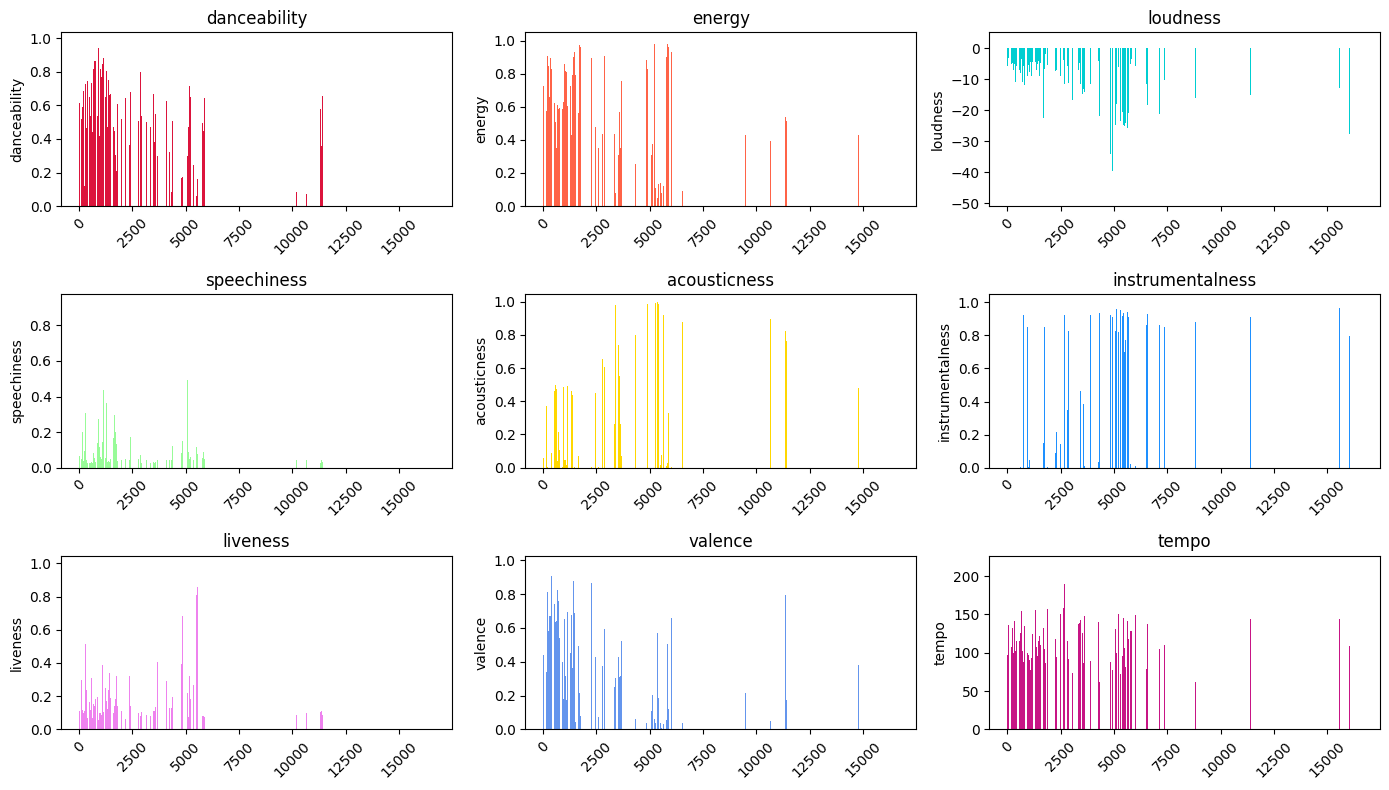

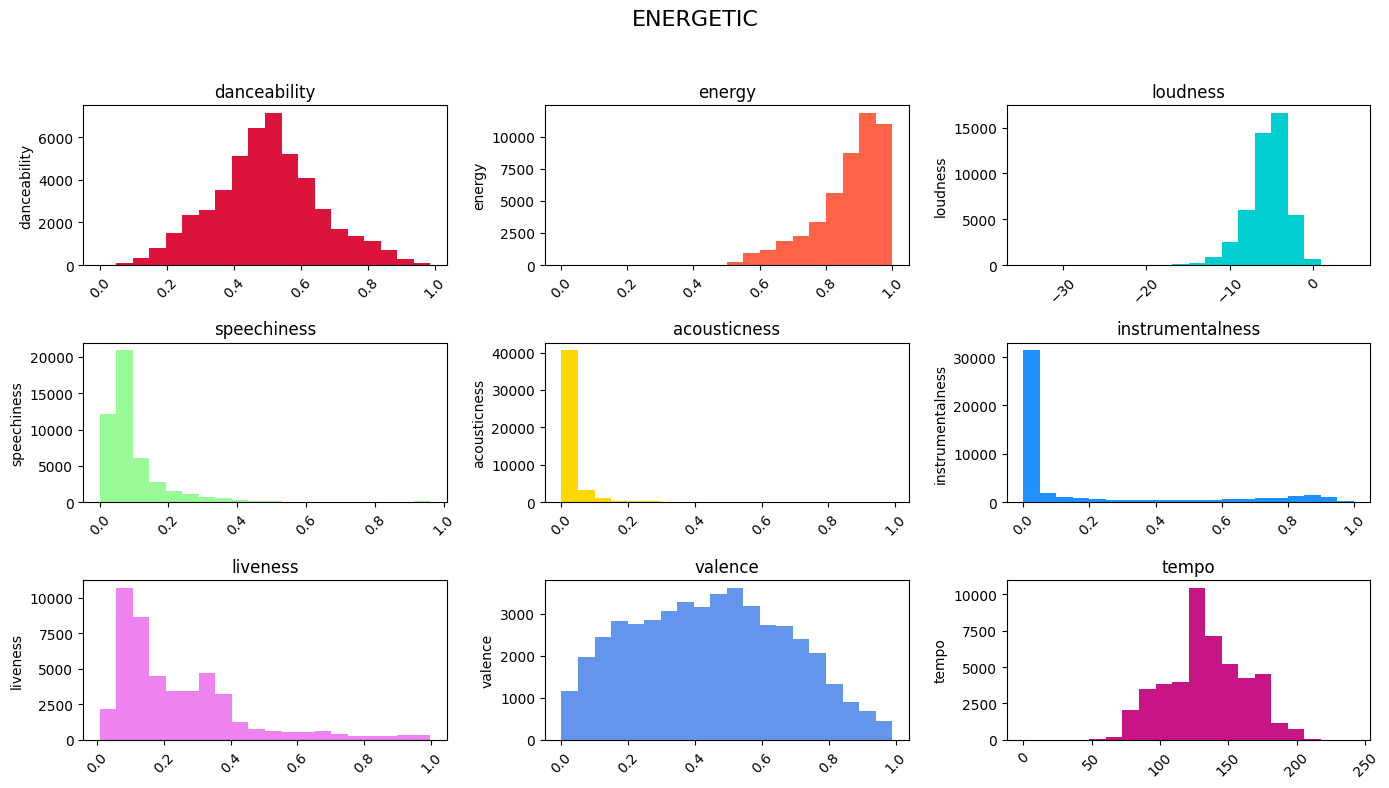

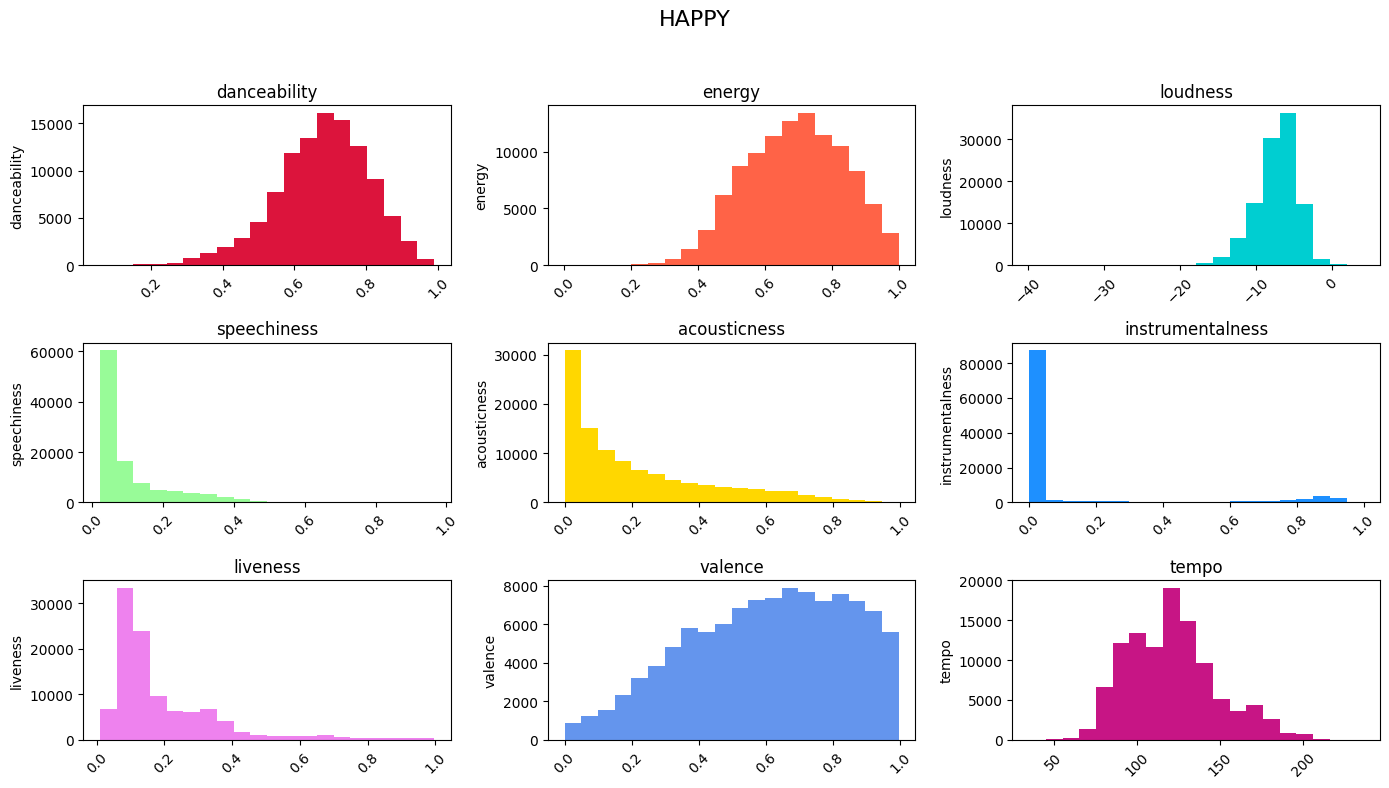

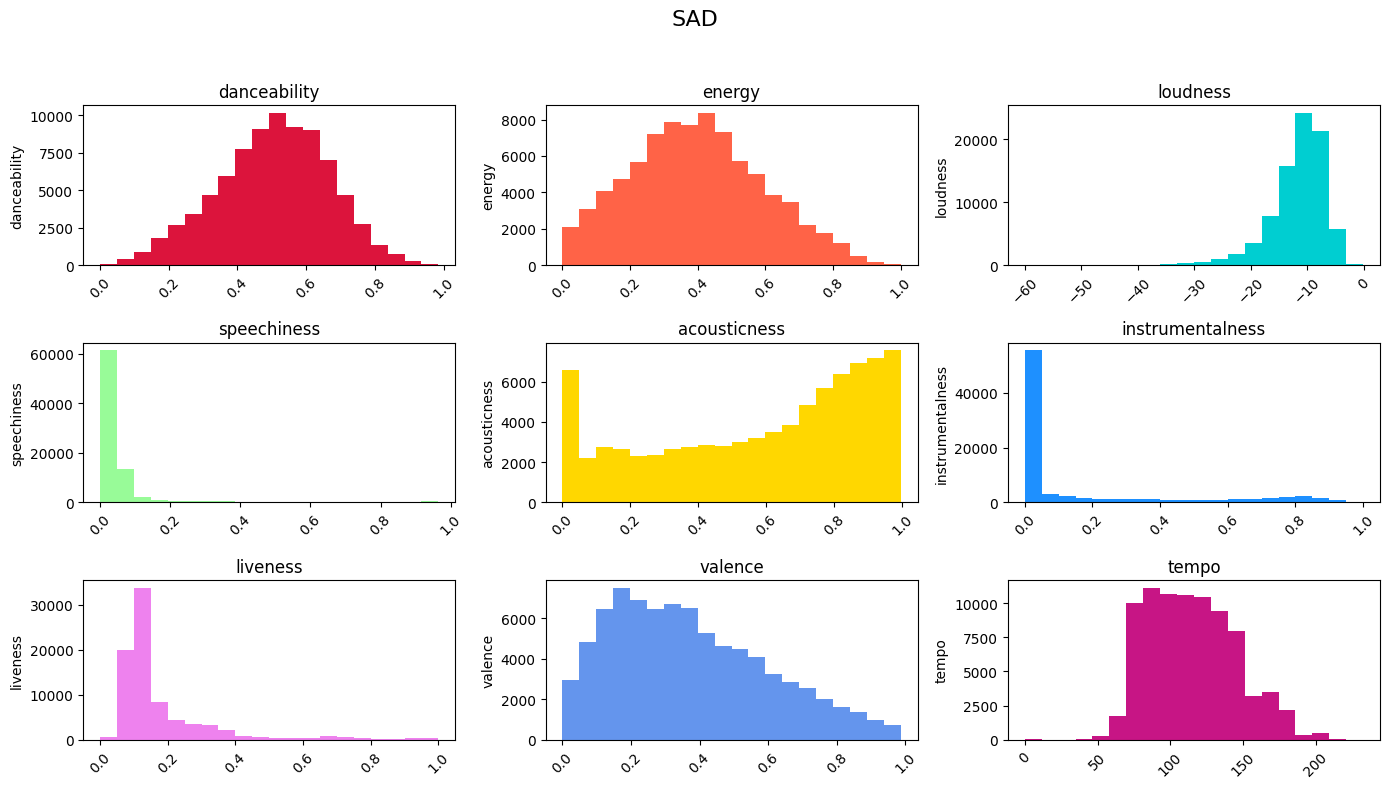

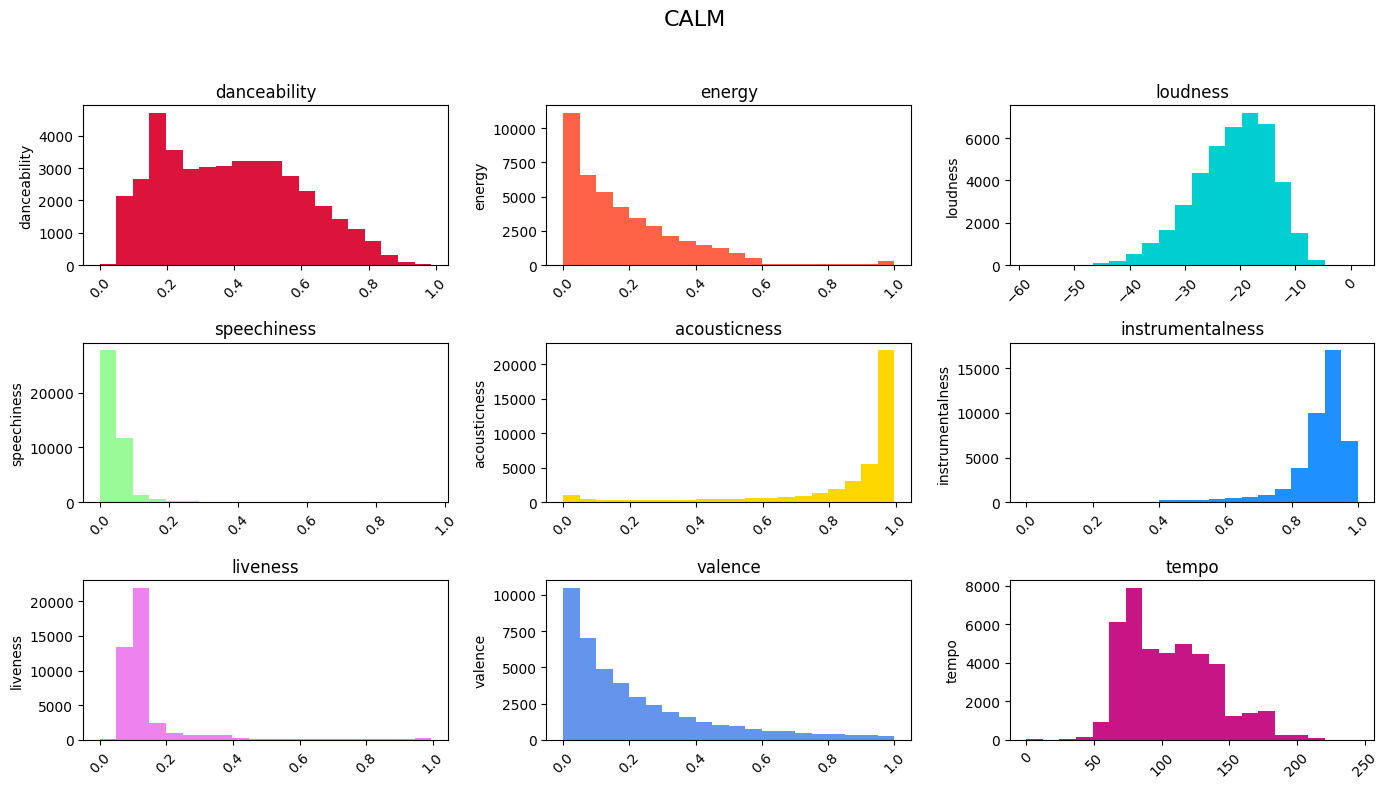

In [54]:
# Para comenzar a clasificar datos, creamos una nueva columna para catgorizar por valores de la mediana
attributes = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(14, 8))

# Creamos una grafica para cada una de las caracteristicas, limitamos el DataFrame a 1000 datos, ya que son bastantes los datos del DataFrame
for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i + 1)
    plt.bar(df_graphics.index, df_graphics[attribute], color=colors[i])
    plt.title(attribute)
    plt.ylabel(attribute)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Ahora graficamos cada una de las caracteristicas por mood en un solo grafico
for mood in df['mood'].unique():
    plt.figure(figsize=(14, 8))
    for i, attribute in enumerate(attributes):
        plt.subplot(3, 3, i + 1)
        plt.hist(df[df['mood'] == mood][attribute], bins=20, color=colors[i])
        plt.title(attribute)
        plt.ylabel(attribute)
        plt.xticks(rotation=45)
    
    plt.suptitle(mood.upper(), fontsize=16)  # Título principal con el valor de 'mood'
    plt.subplots_adjust(top=0.85)  # Ajusta para que no se superpongan el título y las gráficas
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título
    plt.show()

    # Guardamos los datos en un archivo JSON



In [ ]:
def load_mood_ranges(sad, happy, energetic, calm):
    moods = {}
    # Crear diccionario para cada mood
    for mood_name, mood_df in [('sad', sad), ('happy', happy), ('energetic', energetic), ('calm', calm)]:
        moods[mood_name] = {
            'danceability': (mood_df['danceability'].min(), mood_df['danceability'].max()),
            'energy': (mood_df['energy'].min(), mood_df['energy'].max()),
            'loudness': (mood_df['loudness'].min(), mood_df['loudness'].max()),
            'acousticness': (mood_df['acousticness'].min(), mood_df['acousticness'].max()),
            'valence': (mood_df['valence'].min(), mood_df['valence'].max()),
            'tempo': (mood_df['tempo'].min(), mood_df['tempo'].max())
        }
    return moods

mood_ranges = load_mood_ranges(sad, happy, energetic, calm)

# Mostramos los rangos de cada mood
for mood, ranges in mood_ranges.items():
    print(f'{mood.upper()}')
    for attribute, (min_value, max_value) in ranges.items():
        print(f'{attribute}: [{min_value}, {max_value}]')
    print()

# A partir de los valores obtenidos, definimos una funcion para clasificar las canciones en base a sus caracteristicas
def classify_song(danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo):
    # Categoría "energetic"
    if (danceability > 0.4 and energy > 0.6 and loudness > -8 and acousticness < 0.4 and valence > 0.4 and tempo > 140):
        return 'energetic'
    # Categoría "happy"
    elif (danceability > 0.5 and energy > 0.5 and loudness > -8 and acousticness < 0.3 and valence > 0.4 and 100 <= tempo <= 140):
        return 'happy'
    # Categoría "sad"
    elif (danceability < 0.4 and energy < 0.5 and loudness < -10 and acousticness > 0.3 and valence < 0.4 and tempo < 100):
        return 'sad'
    # Categoría "calm"
    elif (danceability < 0.5 and energy < 0.5 and loudness < -8 and acousticness < 0.4 and valence > 0.4 and tempo < 120):
        return 'calm'
    # Categoría "instrumental"
    elif (instrumentalness > 0.5):
        return 'instrumental'
    # Categoría "live performance"
    elif (liveness > 0.3 and energy > 0.6):
        return 'live performance'
    # Categoría indefinida
    else:
        return 'undefined'



SAD
danceability: [0.0898, 0.928]
energy: [0.0124, 0.977]
loudness: [-27.384, -1.853]
acousticness: [2.9e-05, 0.993]
valence: [0.0305, 0.978]
tempo: [47.689, 203.651]

HAPPY
danceability: [0.251, 0.975]
energy: [0.296, 0.987]
loudness: [-17.927, 1.424]
acousticness: [0.000449, 0.855]
valence: [0.0354, 0.976]
tempo: [64.772, 203.973]

ENERGETIC
danceability: [0.0588, 0.987]
energy: [0.528, 1.0]
loudness: [-30.996, 2.624]
acousticness: [1.61e-06, 0.911]
valence: [1e-05, 0.965]
tempo: [52.504, 215.973]

CALM
danceability: [0.0567, 0.966]
energy: [0.000175, 1.0]
loudness: [-48.321, -6.967]
acousticness: [0.0, 0.996]
valence: [1e-05, 0.973]
tempo: [35.103, 205.733]



# Modelado de Datos
Para esta sección debemos de hacer una preparación de datos adicional (previo al test), ya que con la información obtenida anteriormente vamos a realizar un modelo que permita determinar si a un usuario le gustará una canción con base en una de sus playlists.

Para esto, vamos a crear datasets con las canciones que le gustan a un usuario y las que no, y vamos a entrenar un modelo de clasificación que nos permita decidir si a un usuario le gustará una canción o no.

Para la extracción de datos, vamos a utilizar la API de Spotify.

### Parte 1: Extracción de datos de Spotify
Para poder utilizar la API de Spotify, es necesario tener una cuenta de desarrollador y crear una aplicación en la plataforma de Spotify. Para esto, se deben seguir los siguientes pasos:
1. Ingresar a la página de [Spotify for Developers](https://developer.spotify.com/).
2. Iniciar sesión con una cuenta de Spotify.
3. Crear una aplicación en la sección de "Dashboard".
4. Obtener el Client ID y el Client Secret de la aplicación creada.
5. Almacenar el Client ID y el Client Secret en un archivo `credentials.json`.
6. Guardar de igual manera los URI de las playlists que se van a utilizar en el archivo `playlists.json`.



[STEP 1] Setup de Spotify API
Verificando credenciales: 54587eddcc4e42fc880881d3b9b6d56e 7ed2d7eafd524513935ff1fb8a0de0e1


index                                                uri   like
0      0  spotify:user:cari02av:spotify:playlist:64i5wye...   True
1      1  spotify:user:cari02av:spotify:playlist:4415OG5...   True
2      2  spotify:user:unknown:spotify:playlist:0T9nYAPF...  False
3      3  spotify:user:unknown:spotify:playlist:3sb9xMhs...  False

[STEP 2] Extrayendo datos de las canciones de la playlist...
URI: spotify:user:cari02av:spotify:playlist:64i5wyeHqjnHI6gE5lrZ8L
Username: cari02av
Playlist ID: 64i5wyeHqjnHI6gE5lrZ8L
{'tracks': {'href': 'https://api.spotify.com/v1/playlists/64i5wyeHqjnHI6gE5lrZ8L/tracks?offset=0&limit=100&additional_types=track&fields=tracks', 'items': [{'added_at': '2024-11-11T18:19:20Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/cari02av'}, 'href': 'https://api.spotify.com/v1/users/cari02av', 'id': 'cari02av', 'type': 'user', 'uri': 'spotify:user:cari02av'}, 'is_local': False, 'primary_color': None, 'track': {'preview_url': 'https://p.scdn.co/mp3-preview/5be757b41702e580d4f9a6af7bc46a7b9d3545da?cid=54587eddcc4e42fc880881d3b9b6d56e', 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.485   0.638    2    -6.962     0       0.1390       0.30900   
1          0.628   0.825    0    -4.789     1       0.0553       0.04550   
2          0.393   0.575   10    -8.041     1       0.0756       0.12000   
3          0.570   0.892   11    -5.814     1       0.2870       0.08670   
4          0.768   0.755    0    -6.509     1       0.0512       0.16500   
..           ...     ...  ...       ...   ...          ...           ...   
58         0.539   0.846    8    -3.192     1       0.0354       0.00631   
59         0.461   0.776    6    -4.498     1       0.0565       0.01490   
60         0.613   0.822    1    -3.480     1       0.0620       0.02690   
61         0.751   0.642    3    -5.165     0       0.0870       0.08610   
62         0.566   0.716    1    -5.733     1       0.0424       0.00691   

    instrumentalness  liveness  valence    tempo            type  \
0           0.000041    0.1370    0.421  149.990  audio_features   
1           0.136000    0.3460    0.387  163.100  audio_features   
2           0.000196    0.3900    0.169  112.371  audio_features   
3           0.000009    0.2630    0.520   94.933  audio_features   
4           0.000000    0.1870    0.868  100.003  audio_features   
..               ...       ...      ...      ...             ...   
58          0.000002    0.1300    0.462  106.994  audio_features   
59          0.000000    0.1200    0.291  149.985  audio_features   
60          0.000000    0.0783    0.540  139.936  audio_features   
61          0.000000    0.0953    0.388   95.045  audio_features   
62          0.000000    0.3700    0.450   81.068  audio_features   

                        id                                   uri  \
0   5sMEEjviCkH6Rp5X2ZvIIc  spotify:track:5sMEEjviCkH6Rp5X2ZvIIc   
1   1TMWjPjpQGU9t4PfLQ0qJS  spotify:track:1TMWjPjpQGU9t4PfLQ0qJS   
2   2i7fIWzznverPqwz2E4Pml  spotify:track:2i7fIWzznverPqwz2E4Pml   
3   09np8TCtg5O6yYsaxKJlJ0  spotify:track:09np8TCtg5O6yYsaxKJlJ0   
4   0PfL4ATvqQOxMRW9B5CbYC  spotify:track:0PfL4ATvqQOxMRW9B5CbYC   
..                     ...                                   ...   
58  2j1fFjWHCI9KJSwcuYAOyF  spotify:track:2j1fFjWHCI9KJSwcuYAOyF   
59  3bjg5cbmuwDoS7e2dAWyRG  spotify:track:3bjg5cbmuwDoS7e2dAWyRG   
60  7bxGcILuAjkZzaveU28ZJS  spotify:track:7bxGcILuAjkZzaveU28ZJS   
61  2wVDWtLKXunswWecARNILj  spotify:track:2wVDWtLKXunswWecARNILj   
62  5FVbvttjEvQ8r2BgUcJgNg  spotify:track:5FVbvttjEvQ8r2BgUcJgNg   

                                           track_href  \
0   https://api.spotify.com/v1/tracks/5sMEEjviCkH6...   
1   https://api.spotify.com/v1/tracks/1TMWjPjpQGU9...   
2   https://api.spotify.com/v1/tracks/2i7fIWzznver...   
3   https://api.spotify.com/v1/tracks/09np8TCtg5O6...   
4   https://api.spotify.com/v1/tracks/0PfL4ATvqQOx...   
..                                                ...   
58  https://api.spotify.com/v1/tracks/2j1fFjWHCI9K...   
59  https://api.spotify.com/v1/tracks/3bjg5cbmuwDo...   
60  https://api.spotify.com/v1/tracks/7bxGcILuAjkZ...   
61  https://api.spotify.com/v1/tracks/2wVDWtLKXuns...   
62  https://api.spotify.com/v1/tracks/5FVbvttjEvQ8...   

                                         analysis_url  duration_ms  \
0   https://api.spotify.com/v1/audio-analysis/5sME...       203482   
1   https://api.spotify.com/v1/audio-analysis/1TMW...       163389   
2   https://api.spotify.com/v1/audio-analysis/2i7f...       275226   
3   https://api.spotify.com/v1/audio-analysis/09np...       202500   
4   https://api.spotify.com/v1/audio-analysis/0PfL...       190376   
..                                                ...          ...   
58  https://api.spotify.com/v1/audio-analysis/2j1f...       274097   
59  https://api.spotify.com/v1/audio-analysis/3bjg...       238862   
60  https://api.spotify.com/v1/audio-analysis/7bxG...       196506   
61  https://api.spotify.com/v1/audio-analysis/2wVD...       169567   
62

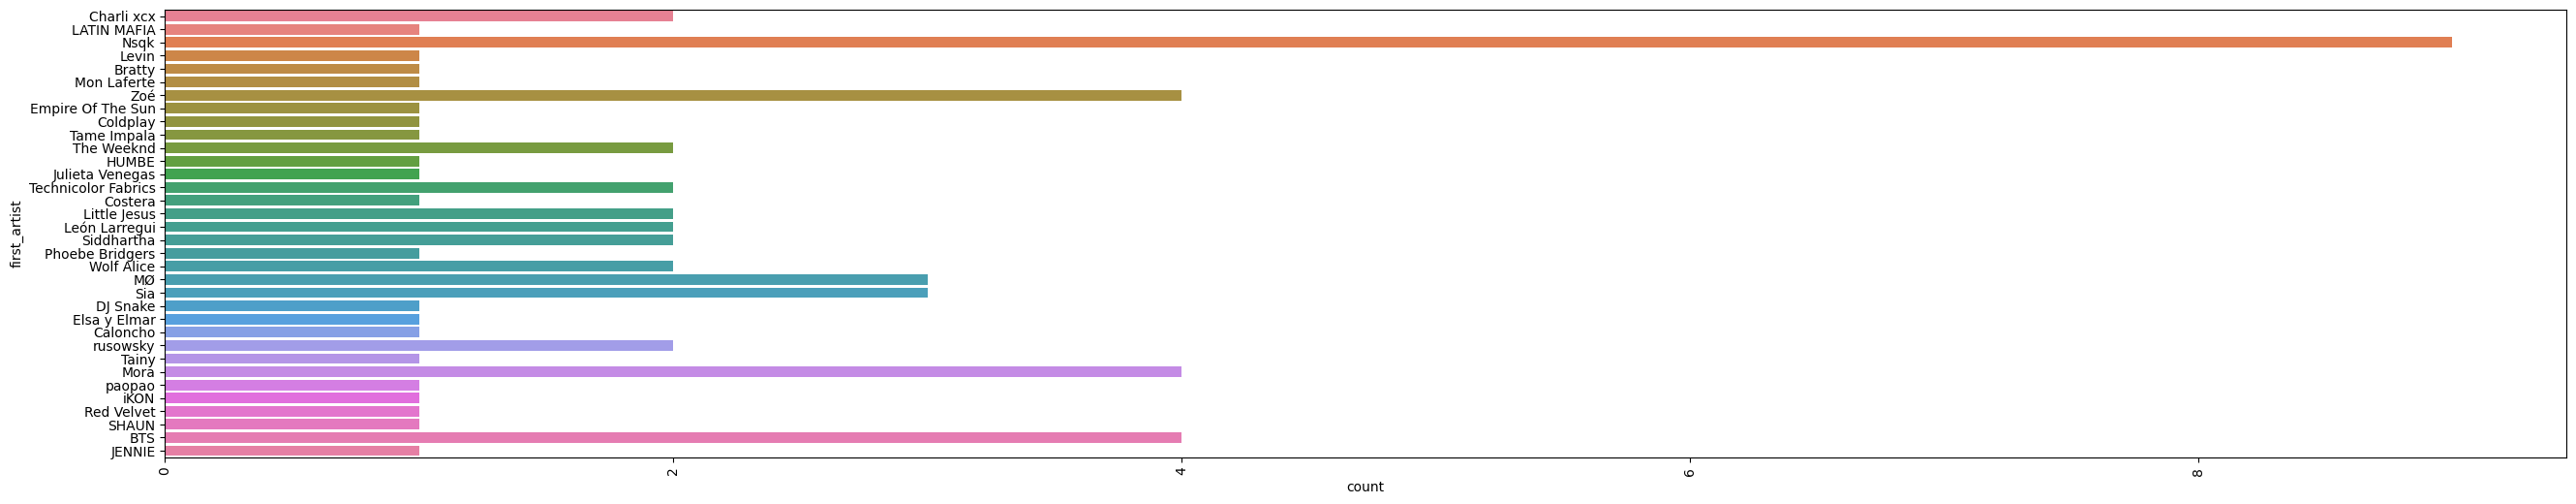

id                   title  danceability  energy  key  \
0  5sMEEjviCkH6Rp5X2ZvIIc  Everything is romantic         0.485   0.638    2   
1  1TMWjPjpQGU9t4PfLQ0qJS           sentado aquí,         0.628   0.825    0   
2  2i7fIWzznverPqwz2E4Pml      Corazón : Classics         0.393   0.575   10   
3  09np8TCtg5O6yYsaxKJlJ0        Tarde o temprano         0.570   0.892   11   
4  0PfL4ATvqQOxMRW9B5CbYC               DÍA A DÍA         0.768   0.755    0   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
0    -6.962     0        0.3090          0.000041     0.137    0.421  149.990   
1    -4.789     1        0.0455          0.136000     0.346    0.387  163.100   
2    -8.041     1        0.1200          0.000196     0.390    0.169  112.371   
3    -5.814     1        0.0867          0.000009     0.263    0.520   94.933   
4    -6.509     1        0.1650          0.000000     0.187    0.868  100.003   

   duration_ms  time_signature  
0       203482               4  
1       163389               4  
2       275226               4  
3       202500               4  
4       190376               4

[STEP 6] Guardando los datos...
Index(['uri', 'like'], dtype='object')
Index([0, 1], dtype='int64', name='index')


id                   title  danceability  energy  key  \
0  5sMEEjviCkH6Rp5X2ZvIIc  Everything is romantic         0.485   0.638    2   
1  1TMWjPjpQGU9t4PfLQ0qJS           sentado aquí,         0.628   0.825    0   
2  2i7fIWzznverPqwz2E4Pml      Corazón : Classics         0.393   0.575   10   
3  09np8TCtg5O6yYsaxKJlJ0        Tarde o temprano         0.570   0.892   11   
4  0PfL4ATvqQOxMRW9B5CbYC               DÍA A DÍA         0.768   0.755    0   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
0    -6.962     0        0.3090          0.000041     0.137    0.421  149.990   
1    -4.789     1        0.0455          0.136000     0.346    0.387  163.100   
2    -8.041     1        0.1200          0.000196     0.390    0.169  112.371   
3    -5.814     1        0.0867          0.000009     0.263    0.520   94.933   
4    -6.509     1        0.1650          0.000000     0.187    0.868  100.003   

   duration_ms  time_signature  class  
0       203482               4      1  
1       163389               4      1  
2       275226               4      1  
3       202500               4      1  
4       190376               4      1

In [62]:
# Extracción de datos de la API de Spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import os

print("[STEP 1] Setup de Spotify API")

credentials = pd.read_json('credentials.json')
client_id = credentials['client_id'].iloc[0]
client_secret = credentials['client_secret'].iloc[0]

print(f"Verificando credenciales: {client_id} {client_secret}")

playlists = pd.read_json('playlists.json')
playlists = pd.DataFrame(playlists)

display(playlists)

playlists.set_index("index", inplace=True)

playlist_index = 0

# Separamos las URIs de las playlists
playlists_uris = playlists['uri']
# Separamos las playlists que nos gustan
like = playlists[playlists['like'] == True]

# Creamos un objeto de Spotify
client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


print("[STEP 2] Extrayendo datos de las canciones de la playlist...")
uri = playlists_uris.iloc[playlist_index]    # the URI is split by ':' to get the username and playlist ID
print(f"URI: {uri}")

username = uri.split(':')[2]
playlist_id = uri.split(':')[5]

print(f"Username: {username}")
print(f"Playlist ID: {playlist_id}")

# Obtenemos los datos de la playlist
results = sp.user_playlist(username, playlist_id, 'tracks')

# Obtenemos los datos de la playlist
print(results)

print("[STEP 3] Extrayendo datos de las canciones de la playlist...")

# Almacenamos los datos de las canciones
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

# Iteramos sobre las canciones de la playlist para obtener los datos
for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

print("[STEP 4] Extrayendo características de las canciones...")

# Obtenemos las caracteristicas de las canciones
features = sp.audio_features(playlist_tracks_id)

import numpy as np
import pandas as pd

features_df = pd.DataFrame(data=features, columns=features[0].keys())

print("[STEP 5] Uniendo los datos de las canciones...")

print("Playlist antes de unir los datos:")
display(features_df)

# Unimos los datos de las canciones
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.head()

plt.figure(figsize=(32,6))
sns.countplot(features_df['first_artist'], palette='husl')
plt.xticks(rotation=90)
plt.show()

features_df = features_df.drop(['first_artist', 'all_artists'], axis=1)
display(features_df.head())

print("[STEP 6] Guardando los datos...")

# Print columns 
print(like.columns)

# Get indexes of playlists that we like
print(like.index)
type(like.index)

if playlist_index in like.index:
    features_df['class'] = np.ones((len(features_df), 1), dtype=int)
else:
    features_df['class'] = np.zeros((len(features_df), 1), dtype=int)

display(features_df.head())


filename = os.path.join('playlist_data', 'playlist' + str(playlist_index) + '.json')

# Save the DataFrame as JSON
features_df.to_json(filename)


### Parte 2: Exploración de Datos de la playlist
Luego de haber obtenido los datos de las playlists, vamos a explorar los datos para determinar cuáles son las características que vamos a utilizar para el modelo de clasificación.

[STEP 1] Setup de Spotify API


danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.485   0.638    2    -6.962     0        0.3090          0.000041   
1         0.628   0.825    0    -4.789     1        0.0455          0.136000   
2         0.393   0.575   10    -8.041     1        0.1200          0.000196   
3         0.570   0.892   11    -5.814     1        0.0867          0.000009   
4         0.768   0.755    0    -6.509     1        0.1650          0.000000   

   liveness  valence    tempo  duration_ms  time_signature  class  
0     0.137    0.421  149.990       203482               4      1  
1     0.346    0.387  163.100       163389               4      1  
2     0.390    0.169  112.371       275226               4      1  
3     0.263    0.520   94.933       202500               4      1  
4     0.187    0.868  100.003       190376               4      1

danceability      energy         key    loudness        mode  \
count    309.000000  309.000000  309.000000  309.000000  309.000000   
mean       0.717524    0.684961    5.475728   -6.144191    0.611650   
std        0.118108    0.138289    3.590693    2.017192    0.488165   
min        0.253000    0.267000    0.000000  -16.158000    0.000000   
25%        0.647000    0.590000    2.000000   -7.186000    0.000000   
50%        0.746000    0.690000    6.000000   -5.930000    1.000000   
75%        0.804000    0.781000    9.000000   -4.914000    1.000000   
max        0.923000    0.994000   11.000000   -1.971000    1.000000   

       acousticness  instrumentalness    liveness     valence       tempo  \
count    309.000000        309.000000  309.000000  309.000000  309.000000   
mean       0.231050          0.027533    0.179598    0.550894  124.973013   
std        0.200086          0.113867    0.155054    0.252442   26.135121   
min        0.000783          0.000000    0.024300    0.045100   75.995000   
25%        0.066800          0.000000    0.090900    0.350000  104.939000   
50%        0.182000          0.000002    0.118000    0.538000  125.842000   
75%        0.325000          0.000809    0.198000    0.744000  141.870000   
max        0.916000          0.879000    0.940000    0.981000  205.059000   

         duration_ms  time_signature       class  
count     309.000000      309.000000  309.000000  
mean   238111.944984        3.977346    0.495146  
std     65255.876735        0.169428    0.500787  
min    122378.000000        3.000000    0.000000  
25%    198080.000000        4.000000    0.000000  
50%    223500.000000        4.000000    0.000000  
75%    264000.000000        4.000000    1.000000  
max    512637.000000        5.000000    1.000000

[STEP 2] Data Plotting


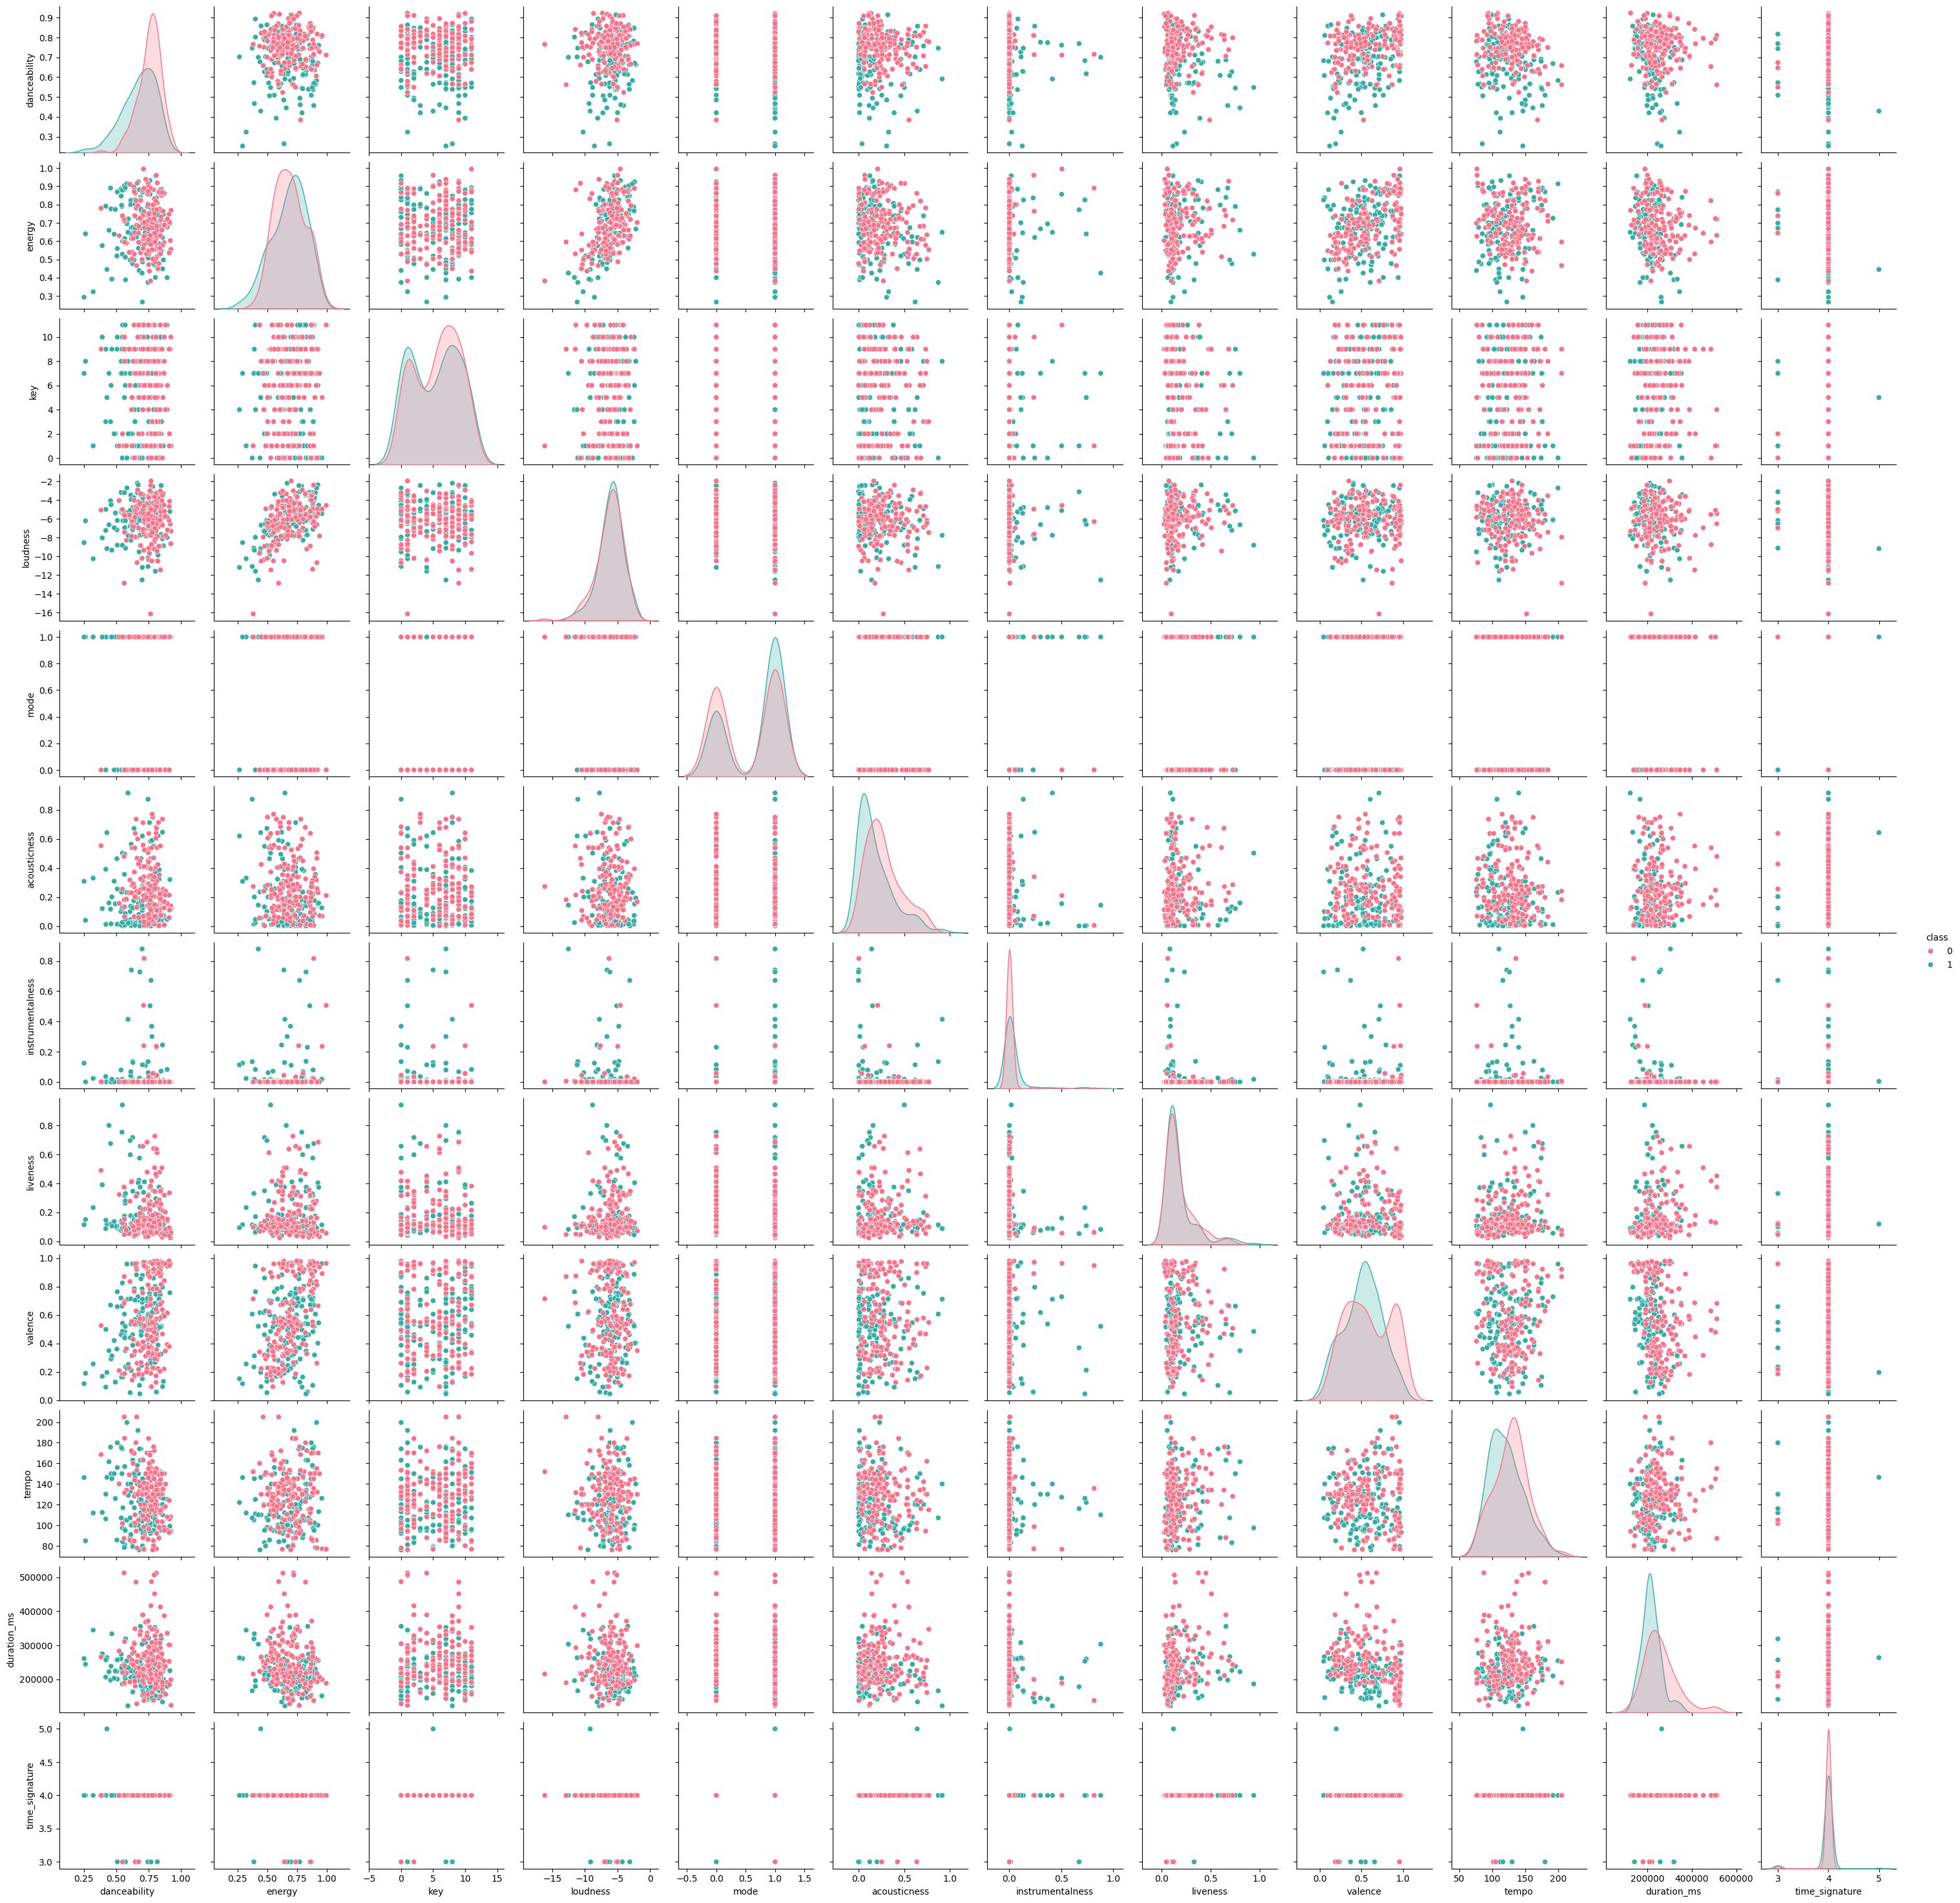

In [126]:
print("[STEP 1] Setup de Spotify API")

import os
df_list = []
for i in range(0,4):
    filename = os.path.join("playlist_data", f"playlist{i}.json")
    try:
        df_list.append(pd.read_json(filename))
    except FileNotFoundError:
        print(f"File {filename} does not exist.")
        continue

songs_playlist = pd.concat(df_list)
songs_playlist = songs_playlist.reset_index()
songs_playlist.head()

songs_playlist = songs_playlist.drop_duplicates()
songs_playlist = songs_playlist.drop('index', axis=1)
songs_playlist = songs_playlist.drop(['id', 'title'], axis=1)

display(songs_playlist.head())
display(songs_playlist.describe())

print("[STEP 2] Data Plotting")

sns.pairplot(data=songs_playlist, hue='class', palette='husl')
plt.show()


### Parte 3: Modelos de Machine Learning

Para realizar nuestro proyecto, hemos decidido utilizar los modelos de `kNN` y `Arboles de decisión` de clasificación de Machine Learning. Para esto, vamos a utilizar la librería `scikit-learn` de Python.

### Arbol de decisión
El árbol de decisión es un modelo de clasificación que se basa en la creación de un árbol de decisiones que se utiliza para predecir la clase de un objeto. El árbol de decisión se construye de manera recursiva, dividiendo el conjunto de datos en subconjuntos más pequeños y más homogéneos.

Árbol de Decisiones - Reporte de Clasificación:
              precision    recall  f1-score   support

        calm       0.94      0.95      0.94       301
   energetic       0.81      0.87      0.84       304
       happy       0.81      0.78      0.80       306
         sad       0.84      0.80      0.82       289

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200

Precisión del Árbol de Decisiones: 0.85


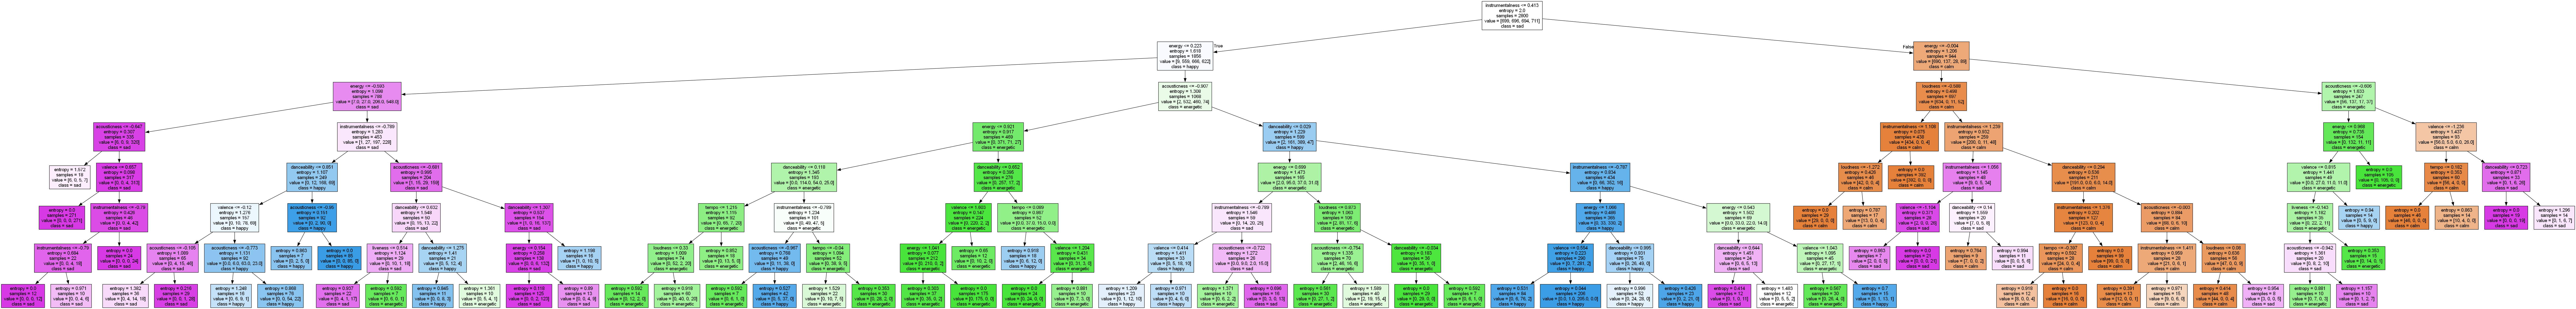

In [ ]:
# Importar librerías necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from subprocess import check_call
from IPython.display import Image as PImage, display
from PIL import Image, ImageDraw, ImageFont

# Cargar los datos
songs = pd.read_json('data/all_songs.json')

# Definir las características (X) y las etiquetas (y)
X = songs[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = songs['mood']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisiones
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=20, min_samples_leaf=7)
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluar el modelo
print("Árbol de Decisiones - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_tree))
print(f"Precisión del Árbol de Decisiones: {accuracy_score(y_test, y_pred_tree)}")

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_split=20,
    min_samples_leaf=7
)

decision_tree.fit(X_train, y_train)

# Guardar el modelo
with open("./img/decision_tree.dot", 'w') as f:
    f = tree.export_graphviz(decision_tree,
                            out_file=f,
                            feature_names=['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
                            class_names=['calm', 'energetic', 'happy', 'sad'],
                            filled=True)

# Convertir el archivo .dot a .png
# Verificar si la carpeta 'img' existe, si no, crearla
if not os.path.exists('./img'):
    os.makedirs('./img')

# check_call(['dot', '-Tpng', './img/decision_tree.dot', '-o', './img/decision_tree01.png'])

# Mostrar la imagen del árbol de decisiones

display(PImage(filename='./img/decision_tree1.png'))



### Entrenamiento con KNN (K-Nearest Neighbors)
El modelo KNN también se utiliza para clasificación, pero a diferencia del árbol de decisiones, KNN no tiene una estructura jerárquica; simplemente encuentra los puntos más cercanos (por proximidad) a una canción desconocida y le asigna el mood mayoritario de esos puntos cercanos.

KNN - Reporte de Clasificación:
              precision    recall  f1-score   support

        calm       0.90      0.96      0.93       301
   energetic       0.78      0.87      0.83       304
       happy       0.77      0.72      0.74       306
         sad       0.85      0.75      0.80       289

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.82      1200
weighted avg       0.83      0.83      0.82      1200

Precisión del KNN: 0.8266666666666667
(1200, 8)


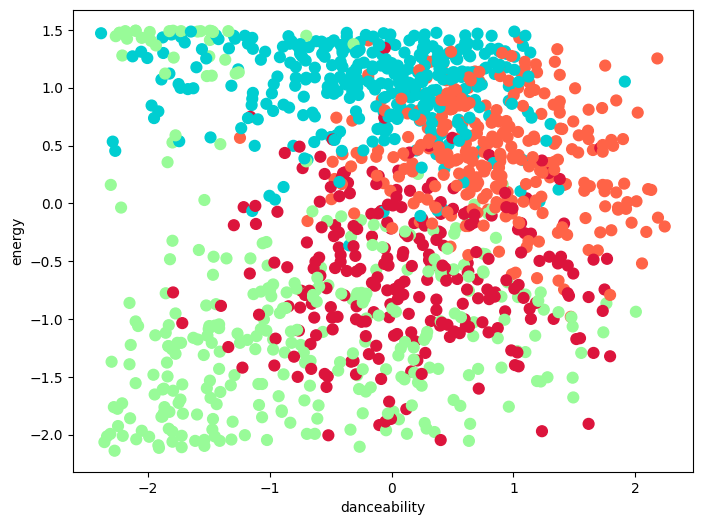

In [ ]:
# Importar KNN y las librerías necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar n_neighbors según sea necesario
knn_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar el modelo
print("KNN - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))
print(f"Precisión del KNN: {accuracy_score(y_test, y_pred_knn)}")

print(X_test.shape)



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Asignar colores según las predicciones
asignar = []
for row in y_pred_knn:
    if row == 'sad':
        asignar.append(colors[0])
    elif row == 'happy':
        asignar.append(colors[1])
    elif row == 'energetic':
        asignar.append(colors[2])
    elif row == 'calm':
        asignar.append(colors[3])

# Usamos solo las dos primeras características para el gráfico en 2D
ax.scatter(X_test[:, 0], X_test[:, 1], c=asignar, s=60)
ax.set_xlabel('danceability')
ax.set_ylabel('energy')

# Guardar el modelo KNN
plt.savefig('./img/knnModel.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

#### Ajuste de Hiperparámetros de kNN
Para el modelo de KNN, vamos a ajustar el hiperparámetro `n_neighbors` para determinar cuál es el mejor valor para este hiperparámetro.

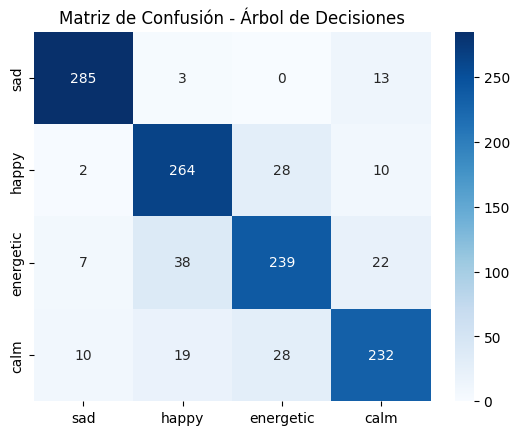

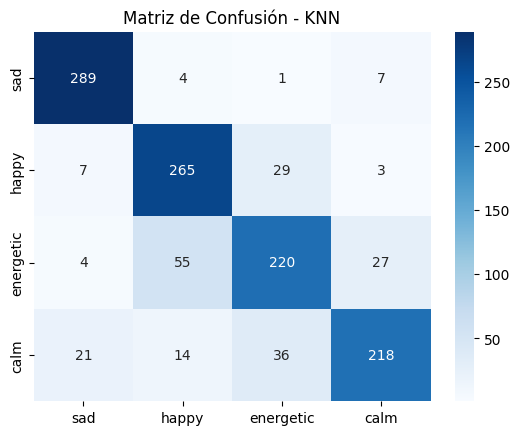

In [ ]:
# Ajuste de KNN
knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance')  # Probar diferentes valores de n_neighbors
knn_model.fit(X_train, y_train)


import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión para el Árbol de Decisiones
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=['sad', 'happy', 'energetic', 'calm'], yticklabels=['sad', 'happy', 'energetic', 'calm'])
plt.title("Matriz de Confusión - Árbol de Decisiones")
plt.show()

# Matriz de confusión para KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['sad', 'happy', 'energetic', 'calm'], yticklabels=['sad', 'happy', 'energetic', 'calm'])
plt.title("Matriz de Confusión - KNN")
plt.show()


#### Pruebas del modelo con nuestras playlists
Vamos a probar nuestras playlists con ambos modelos y ver cuál es el resultado de la predicción.

In [ ]:
# caro_playlist = pd.read_json('playlist_data/playlist0.json')
# caro_playlist = pd.read_json('playlist_data/playlist1.json')
# caro_playlist = pd.read_json('playlist_data/playlist2.json')
caro_playlist = pd.read_json('playlist_data/playlist3.json')


# Definir las características (X) y las etiquetas (y)
X_caro = caro_playlist[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
X_caro_scaled = scaler.transform(X_caro)

# Tomamos un ejemplo de la playlist de Caro
print("Prediccion para una cancion de la playlist de Caro")
example_song = X_caro_scaled[0].reshape(1, -1)
print(example_song)

data_example_song = caro_playlist.iloc[0]

print(f"Nombre de la cancion: {data_example_song['title']}\n")
print("Prediccion:" + tree_model.predict(example_song))
print("Probabilidad de cada clase:")
print(tree_model.predict_proba(example_song))
print("Probabilidad de acierto: " + str(tree_model.score(X_test, y_test) * 100) + "%")


# Prediccion con kNN
print("Prediccion para una cancion de la playlist de Caro")
print("Prediccion:" + knn_model.predict(example_song))
print("Probabilidad de cada clase:")
print(knn_model.predict_proba(example_song))
print("Probabilidad de acierto: " + str(knn_model.score(X_test, y_test) * 100) + "%")


# Escribimos los resultados en un archivo de texto
with open('results3.txt', 'w') as f:
    f.write(f"Árbol de Decisiones\n")
    f.write(f"Predicción: {tree_model.predict(example_song)}\n")
    f.write(f"Probabilidad de cada clase: {tree_model.predict_proba(example_song)}\n")
    f.write(f"Probabilidad de acierto: {tree_model.score(X_test, y_test) * 100}%\n\n")
    f.write(f"kNN\n")
    f.write(f"Predicción: {knn_model.predict(example_song)}\n")
    f.write(f"Probabilidad de cada clase: {knn_model.predict_proba(example_song)}\n")
    f.write(f"Probabilidad de acierto: {knn_model.score(X_test, y_test) * 100}%\n")




Prediccion para una cancion de la playlist de Caro
[[ 1.42589689 -0.10571983  0.64300084 -0.66262302 -0.78966959  0.31804408
  -0.44494108 -0.07226557]]
Nombre de la cancion: Diles

['Prediccion:happy']
Probabilidad de cada clase:
[[0. 0. 1. 0.]]
Probabilidad de acierto: 85.0%
Prediccion para una cancion de la playlist de Caro
['Prediccion:happy']
Probabilidad de cada clase:
[[0. 0. 1. 0.]]
